# Linear Regression

# Introduction

Linear Regression is the most common Supervised Learning algorithm. It helps in making easy predictions and can be used to predict the value of target variables given one or more features. For instance, this project uses the Bike Sharing dataset to predict the bike sharing count using the weather conditions.

In this experiment, Least Squares and Least mean square models are used. These models are implemented using Python classes LinearRegress (Least Squares) and LMS (Least Mean Squares). The steps performed in the experiment are as follows:
* Bike sharing dataset is divided into training and test set, which are 75% and 25% respectively
* Both Least Squares and Least Mean Squares (single-step and batch) are trained on the training set and the fitting line is plotted
* Test of the model is performed using the test set and root mean square error is reported

# Data

Bike sharing systems are the new generation of bike rentals which automates each and every step in the process, from membership to rental to the return back. Moreover, some of these systems are advanced enough to track the position of the bikes and the duration of the travel. Thus, these systems generate huge amount of data and hence are interesting area to perform experiments.

In this assignment, the bike sharing dataset from Capital Bike Share is used to perform predictions using Linear Model. The dataset is downloaded from UCI Machine Learning Repository (http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset). However, the original source of data is Capital Bike Share data (http://capitalbikeshare.com/system-data). It is consolidated with Weather Information (http://www.freemeteo.com) and Holiday Schedule (http://dchr.dc.gov/page/holiday-schedule)

Fields contained in the data are as follows:
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

* instant: record index
* dteday : date
* season : season (1:springer, 2:summer, 3:fall, 4:winter)
* yr : year (0: 2011, 1:2012)
* mnth : month ( 1 to 12)
* hr : hour (0 to 23)
* holiday : weather day is holiday or not (extracted from [Web Link])
* weekday : day of the week
* workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
* weathersit : 
    * 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp : Normalized temperature in Celsius. The values are derived via (t*t_min)/(t_max*t_min), t_min=*8, t_max=+39 (only in hourly scale)
* atemp: Normalized feeling temperature in Celsius. The values are derived via (t*t_min)/(t_max*t_min), t_min=*16, t_max=+50 (only in hourly scale)
* hum: Normalized humidity. The values are divided to 100 (max)
* windspeed: Normalized wind speed. The values are divided to 67 (max)
* casual: count of casual users
* registered: count of registered users
* cnt: count of total rental bikes including both casual and registered

### Data Reading and Preprocessing

The following cell performs reading and pre-processing of data. As pre-processing, I have:
* Converted the columns "Seasons" and "Weather" to categorical values
* Converted the "dteday" (Date) column to Python's datetime

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Define categories
weekdays = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
seasons = ['N/A', 'Spring', 'Summer', 'Fall', 'Winter']
weather = ['N/A', 'Clear', 'Mist', 'Light Snow/Rain', 'Heavy Snow/Rain']

# Read bike sharing data
data = pd.read_csv('hour.csv')

# Convert to categorical columns
data['season'] = pd.Categorical.from_codes(data['season'], seasons)
data['weathersit'] = pd.Categorical.from_codes(data['weathersit'], weather)
#data['weekday'] = pd.Categorical.from_codes(data['weekday'], weekdays)
                      
# Convert dteday to datetime
data['dteday'] = pd.to_datetime(data['dteday'], infer_datetime_format=True)

data.sample(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
7529,7530,2011-11-15,Winter,0,11,8,0,2,1,Mist,0.54,0.5152,0.68,0.1045,27,453,480
3111,3112,2011-05-14,Summer,0,5,13,0,6,0,Light Snow/Rain,0.52,0.5000,1.00,0.0896,68,180,248
4546,4547,2011-07-13,Fall,0,7,8,0,3,1,Clear,0.80,0.7424,0.49,0.2537,31,418,449
13054,13055,2012-07-03,Fall,1,7,3,0,2,1,Clear,0.70,0.6515,0.65,0.1343,0,2,2
16086,16087,2012-11-07,Winter,1,11,23,0,3,1,Light Snow/Rain,0.28,0.2727,0.65,0.2239,3,37,40
7972,7973,2011-12-03,Winter,0,12,20,0,6,0,Clear,0.30,0.3182,0.61,0.0896,17,110,127
2200,2201,2011-04-06,Summer,0,4,13,0,3,1,Clear,0.46,0.4545,0.38,0.4925,29,83,112
13000,13001,2012-06-30,Fall,1,6,21,0,6,0,Clear,0.82,0.7727,0.52,0.1642,48,165,213
2469,2470,2011-04-17,Summer,0,4,19,0,0,0,Clear,0.56,0.5303,0.30,0.2985,75,135,210
6147,6148,2011-09-18,Fall,0,9,17,0,0,0,Mist,0.56,0.5303,0.64,0.1940,95,230,325


### Bike Registrations over time
Following plot indicates the bike rentals over time. The curve is smoothened by using intervals. There are two lines indicating registration counts from casual users and registered users. Bike rentals by the registered users have always been more than the casual users.

We could also see that the rentals have been increasing over the years. That means, the company has acquired more business in the year 2012 than 2011.

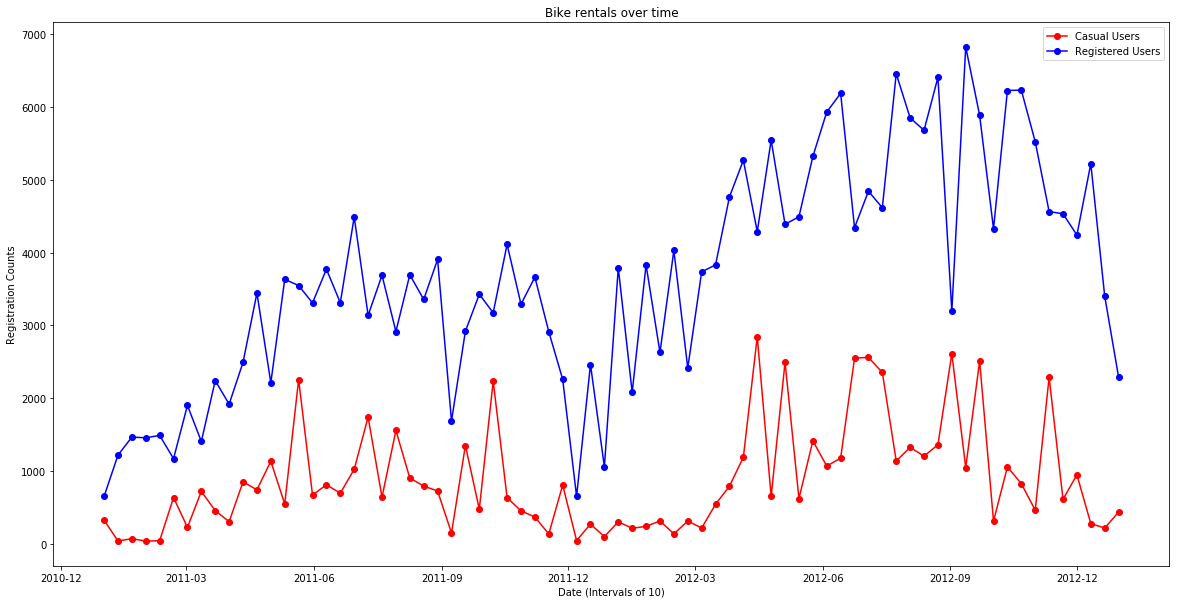

In [16]:
# Bike rentals over time
daily_counts = data.groupby('dteday')[['casual', 'registered']].sum()
# Convert index column to datetime
plt.figure(figsize=(20,10))
plt.title('Bike rentals over time')
plt.plot(daily_counts.index.values[0::10], daily_counts['casual'].values[0::10],'ro-', label='Casual Users')
plt.plot(daily_counts.index.values[0::10], daily_counts['registered'].values[0::10],'bo-', label='Registered Users')
plt.xlabel('Date (Intervals of 10)')
plt.ylabel('Registration Counts')
plt.legend()
plt.show()

### Bike Rentals against time of the day
The following graph plots Bike Rental counts against the hour of the day. From the graph we can clearly deduce that most of the bike rentals are done for the purpose of going to the work and going back to home from the work.

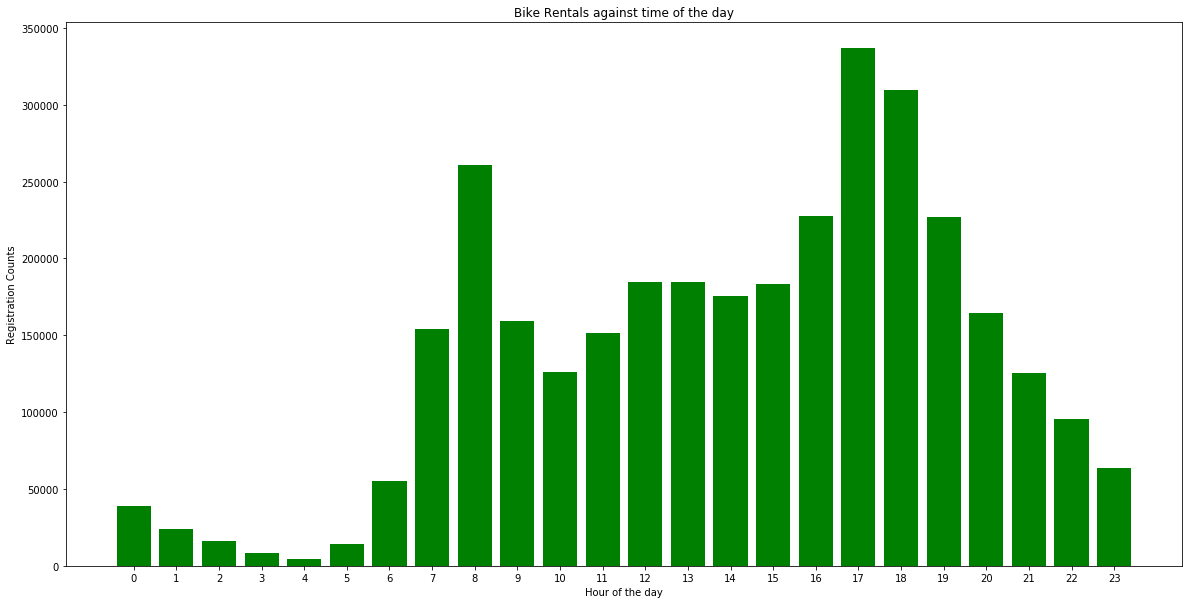

In [17]:
hour_counts = data.groupby('hr')[['cnt']].sum()
plt.figure(figsize=(20,10))
plt.title('Bike Rentals against time of the day')
plt.bar(hour_counts.index.values, hour_counts['cnt'].values, color='g')
plt.xlabel('Hour of the day')
plt.ylabel('Registration Counts')
plt.xticks(hour_counts.index.unique())
plt.show()

### Box plot against Weather Situations
The following box plot, plots the count rental count against the weather condition. It can be clearly deduced from the plot that most of the rentals happened during Clear and Mist weather situations.

/Users/bairathirahul/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


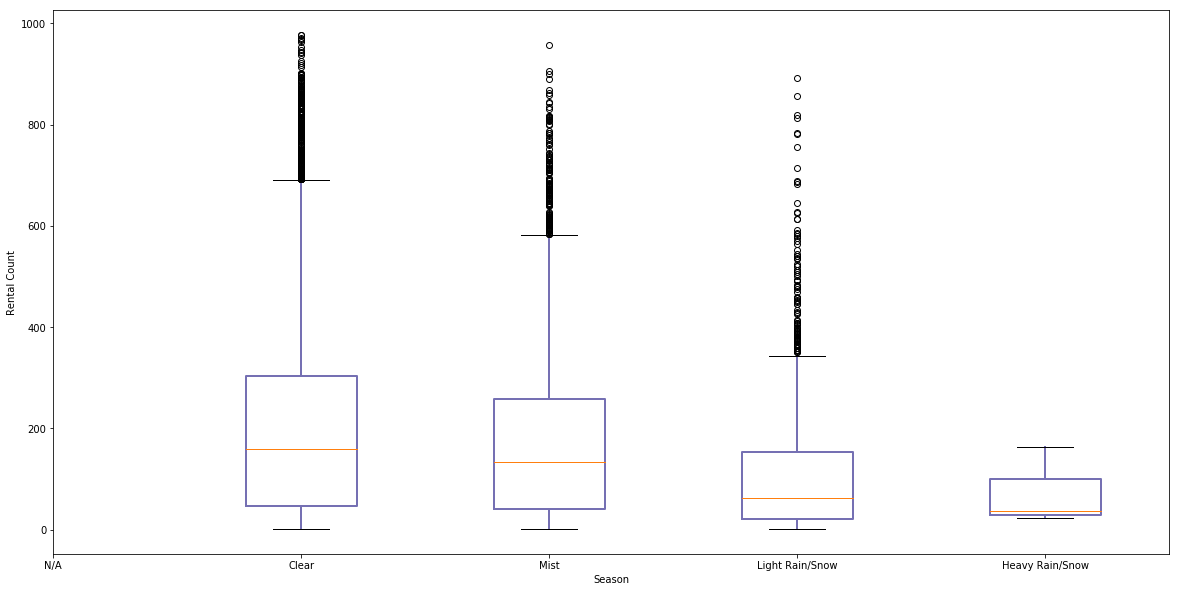

In [18]:
plt.figure(figsize=(20,10))
bp = plt.boxplot([data[(data.weathersit == 'Clear')]['cnt'], data[(data.weathersit == 'Mist')]['cnt'], data[(data.weathersit == 'Light Snow/Rain')]['cnt'], data[(data.weathersit == 'Heavy Snow/Rain')]['cnt']])
for box in bp['boxes']:
    # change outline color
    box.set(color='#7570b3', linewidth=2)

# change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)
    
plt.xticks(range(5), ['N/A', 'Clear', 'Mist', 'Light Rain/Snow', 'Heavy Rain/Snow'])
plt.xlabel('Season')
plt.ylabel('Rental Count')
plt.show()

# Method


## Linear Models
A Linear Model helps in determining the relation between selected features and the target variable as a linear equation of the form:

$$
\begin{align}
  y = ax + b
\end{align}
$$

For vectors, it can also be illustrated as the dot product between the feature vector and the weight vector.

$$
\begin{align}
  f(x; w) &= v^\top x = \sum_0^D w_i x_i \\
     &= w_0 x_0 + w_1 x_1 + \cdots + w_D x_D
\end{align}
$$

The linearity feature of the model makes the optimization easy by using derivatives. The model limits the complexity so its representation is also limited. However, it can prevent possible overfitting with the simple modeling, especially when we have sparsely sampled data.

### Error Function / Cost Function
The error function gives a measure of how well our model has performed. It is calculated as the sum of the squares of the difference between predicted and referenced value. It can be represented as follows

$$
E(w) = \sum_{i=1}^N \Big( f(x_i; w_i) - t_i \Big)^2
$$


### Least Square
Considering the error function described in the above section, obviously the model that gives the least value for this error would be the best model.

$$
w^* = \arg\min_w \sum_{i=1}{N} \Big( f(x_i; w) - t_i \Big)^2
$$

The error function is quadratic. Therefore, to get we can get the parameters giving minimum by taking the derivating of the function and setting it to 0. This derivation gives us following relation.

$$
\begin{align}
 2 X^\top X w - 2 X^\top T  &= 0\\
\\
X^\top X w &= X^\top T\\
\\
w &= \big(X^\top X\big)^{-1} X^\top T
\end{align}
$$

#### Implementation
Implementation of this model is done in the LinearRegress class. The method "train" takes a feature matrix X and reference values Y of the training set and apply the above relation to generate weights. The weights are stored in array "w". 
The "use" method can be used to execute the trained model on the test dataset. It returns an array of projected results by performing dot product of weight vector (w) with features (X) of test dataset.


### Least Mean Square
The Least Square model uses entire dataset at one for training the model and finding the best weights. Even though it does well but it is often computationally costly, especially when we have large number of features and a very large training dataset.

In case of large dataset, *sequential* or *online* learning is preferred. In this method, the records of the dataset are fed to the training function one-by-one, which in turn update weights. Using the updated parameters, it makes a new estimation and repeat these steps. 

Initially the weight vector w is assigned with random values and it is updated as follows until convergence. 
When $k$ represents the steps for the repetition,

$$
w^{(k+1)} = w^{(k)} - \alpha \nabla E_k 
$$

where $E_k$ is the error for the $k$'th sample and $\alpha$ is a learning rate. 
This method is also called *stochastic gradient descent* or *sequential gradient descent*. 

For the $k$'th sample $\xv_k$, the gradient for the sum-of-squares error is

$$
\begin{align}
\nabla E_k = \frac{\partial E}{\partial w^{(k)}} &= \frac{\partial }{\partial w^{(k)}}\Big( f(x_k; w^{(k)}) - t_k \Big)^2 \\
        &= 2 \Big( f(x_k; w^{(k)}) - t_k \Big) \frac{\partial }{\partial w^{(k)}} \Big( f(x_k; w^{(k)}) - t_k \Big) \\
        &= 2 \Big( {w^{(k)}}^\top x_k - t_k \Big) \frac{\partial }{\partial w^{(k)}} \Big( {w^{(k)}}^\top x_k - t_k \Big) \\
        &= 2\Big( {w^{(k)}}^\top x_k - t_k \Big) x_k.
\end{align}
$$
This gives the following update rule for each sample:

$$
w^{(k+1)} = w^{(k)} - \alpha \Big( {w^{(k)}}^\top x_k - t_k \Big) x_k.
$$

#### Implementation
For implementation of Least Mean Square model, in the LMS class two methods are defined, namely "train" and "train_step". 
* **train_step**: This method takes a sample from the training dataset one by one and adjusts the weight vector using the above equation
* **train**: The train method calls train_step method, for each record in the training set
* **use**: The purpose of "use" method is same as in the "LinearRegress" class

### Super Classs Definition

In [19]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract functions ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

### Least Squares

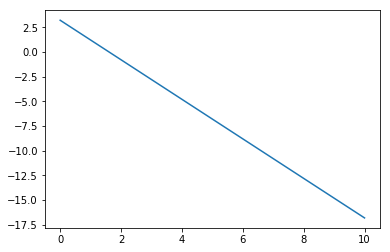

In [20]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        # Add ones to the X array
        X = self.add_ones(X)
        # Calculate weights using the formula
        self.w = np.linalg.inv(X.T @ X) @ X.T @ T
    
    # apply the learned model to data X
    def use(self, X):
        t = self.w.T @ self.add_ones(X).T
        return t.T
    
X = np.linspace(0,10, 11).reshape((-1, 1))

T = -2 * X + 3.2

ls = LinearRegress()

ls.train(X, T)

plt.plot(ls.use(X))

### Least Mean Squares

In [21]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
    
    # batch training by using train_step function
    def train(self, X, T):
        for x, t in zip(X, T):
            self.train_step(x, t)
            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        # Add 1 to the record
        x = np.insert(x, 0, 1).reshape(-1, 1)
        if self.w is None:
            self.w = np.zeros((x.shape[0], 1))
            
        error = self.w.T @ x - t
        self.w = np.subtract(self.w, self.alpha * error * x)
    
    # apply the current model to data X
    def use(self, X):
        t = self.w.T @ self.add_ones(X).T
        return t.T

### Usage Examples

In [22]:
# HERE follow are for my code tests.

import matplotlib.pyplot as plt
%matplotlib inline

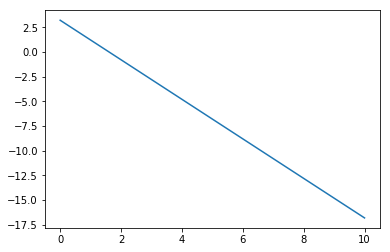

In [23]:
X = np.linspace(0,10, 11).reshape((-1, 1))

T = -2 * X + 3.2

ls = LinearRegress()

ls.train(X, T)

plt.plot(ls.use(X))

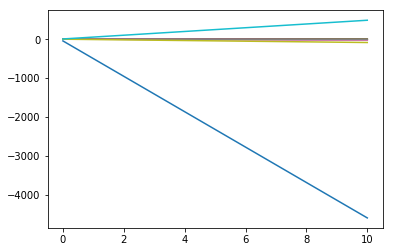

In [24]:
lms = LMS(0.1)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))

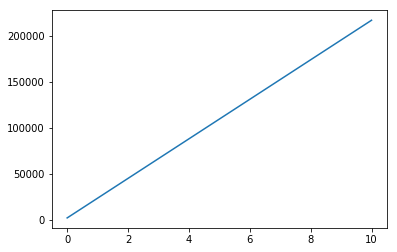

In [25]:
lms.train(X, T)
plt.plot(lms.use(X))

# Experiments

For the experiment, I am taking two random samples for training and test data which are 75% and 25% respectively. In each of the experiments, both LinearRegress and LMS models are trained using the trained sample and tested using the test sample. Root mean square error is reported as the result

In [26]:
# Divide the dataset into Training and Test
train = data.sample(frac=.75)
test = data.sample(frac=.25)

## Experiment 1 - Bike Rental vs Weather Conditions (Temperature, Humidity and Windspeed)
I think Temperature, Humidity and Windspeed are the most important factors that determines bike rental. To verify this hypothesis, the coded models are trained for these three features.

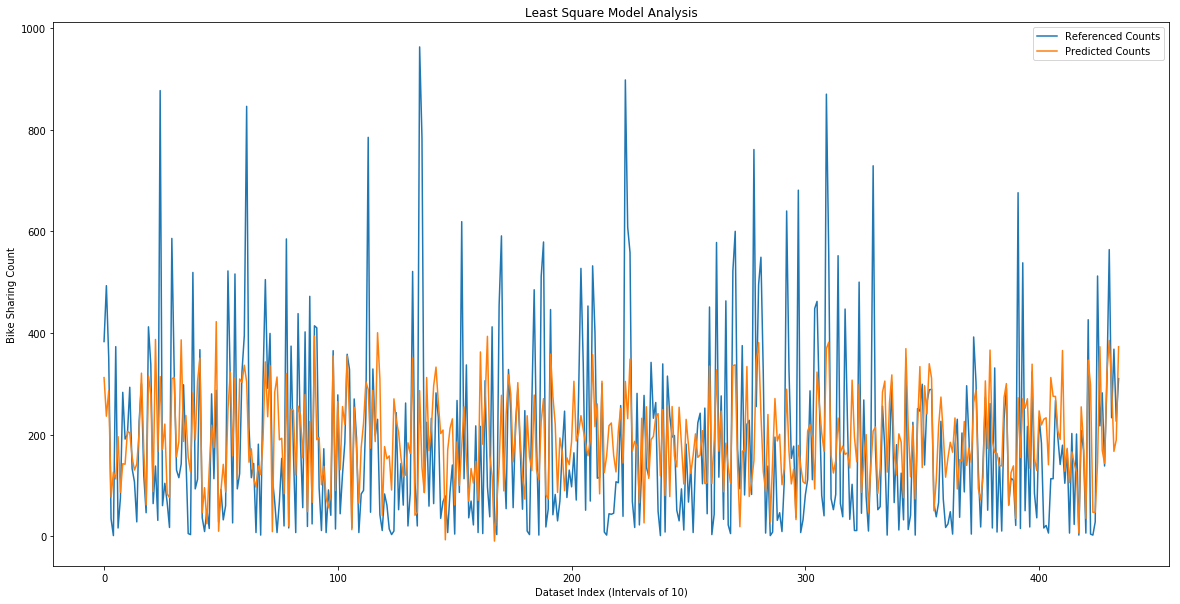

The root mean square error is: 201.0561460877005


In [27]:
# Train Least Square Model
ls = LinearRegress()
ls.train(train[['temp', 'hum', 'windspeed']].values, train['cnt'].values.reshape(-1, 1))

T = ls.use(test[['temp', 'hum', 'windspeed']].values)
plt.figure(figsize=(20,10))
plt.title('Least Square Model Analysis')
plt.plot(test['cnt'].values[0::10], label='Referenced Counts')
plt.plot(T[0::10], label='Predicted Counts')
plt.xlabel('Dataset Index (Intervals of 10)')
plt.ylabel('Bike Sharing Count')
plt.legend()
plt.show()

error = np.sqrt(((test['cnt'].values - T) ** 2).mean())
print('The root mean square error is: ' + str(error))

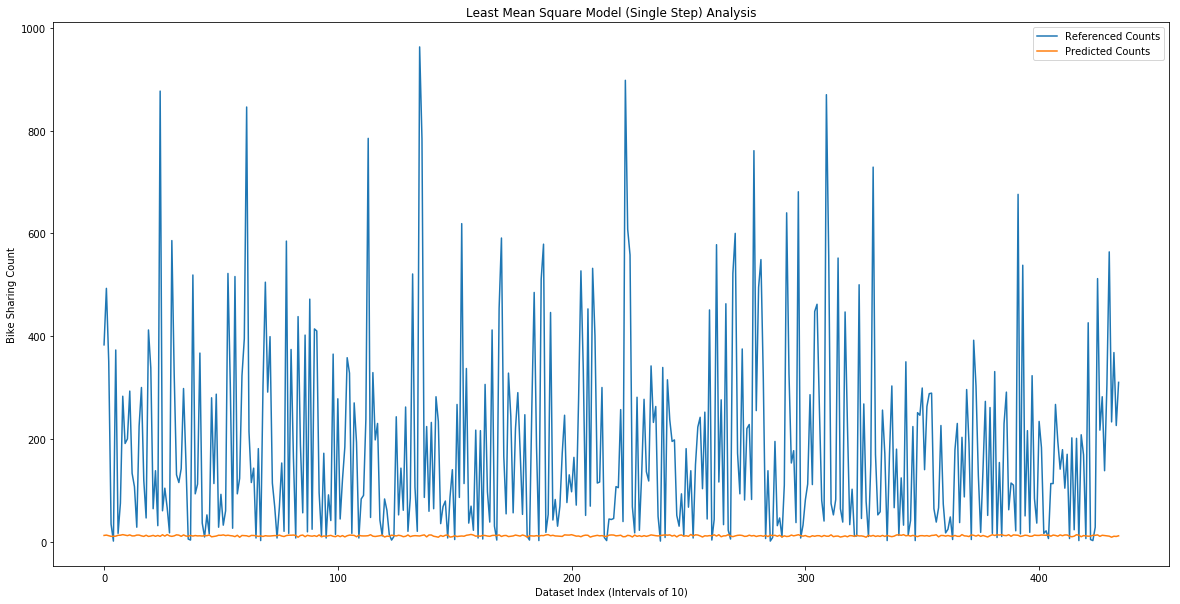

The root mean square error is: 252.37486993548407


In [28]:
# Train Least Mean Square Model (Single Step)
lms = LMS(0.05)
lms.train_step(train[['temp', 'hum', 'windspeed']].values[0], train['cnt'].values.reshape(-1, 1)[0])

T = lms.use(test[['temp', 'hum', 'windspeed']].values)
plt.figure(figsize=(20,10))
plt.title('Least Mean Square Model (Single Step) Analysis')
plt.plot(test['cnt'].values[0::10], label='Referenced Counts')
plt.plot(T[0::10], label='Predicted Counts')
plt.xlabel('Dataset Index (Intervals of 10)')
plt.ylabel('Bike Sharing Count')
plt.legend()
plt.show()

error = np.sqrt(((test['cnt'].values - T) ** 2).mean())
print('The root mean square error is: ' + str(error))

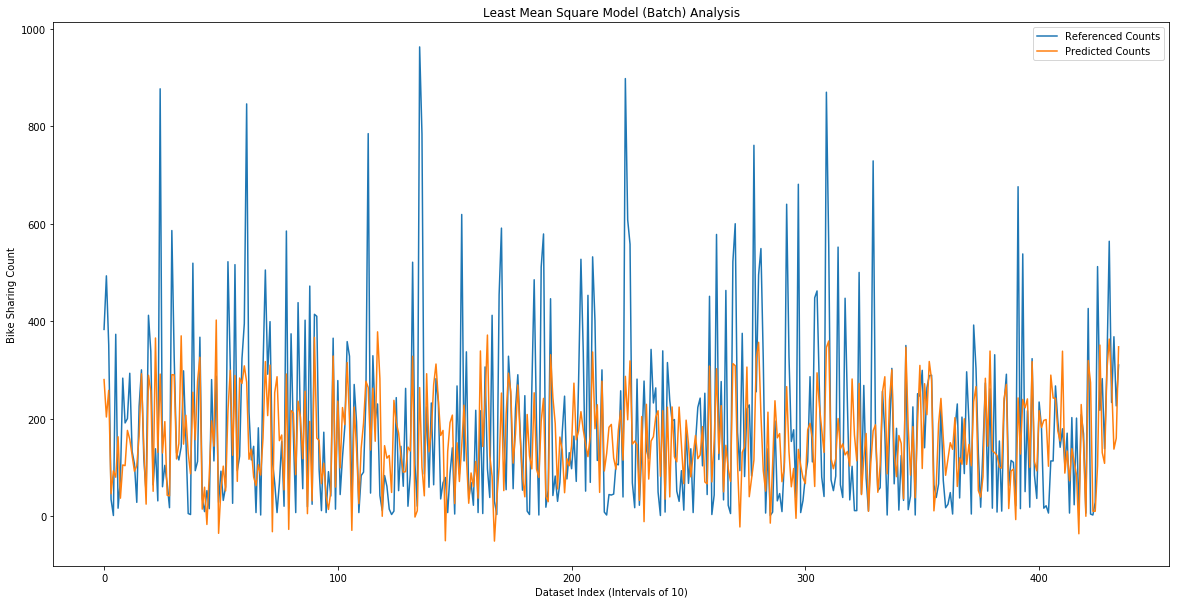

The root mean square error is: 205.0866686835026


In [29]:
# Train Least Mean Square Model (Batch)
lms = LMS(0.05)
lms.train(train[['temp', 'hum', 'windspeed']].values, train['cnt'].values.reshape(-1, 1))

T = lms.use(test[['temp', 'hum', 'windspeed']].values)
plt.figure(figsize=(20,10))
plt.title('Least Mean Square Model (Batch) Analysis')
plt.plot(test['cnt'].values[0::10], label='Referenced Counts')
plt.plot(T[0::10], label='Predicted Counts')
plt.xlabel('Dataset Index (Intervals of 10)')
plt.ylabel('Bike Sharing Count')
plt.legend()
plt.show()

error = np.sqrt(((test['cnt'].values - T) ** 2).mean())
print('The root mean square error is: ' + str(error))

### Comparison of Results 
Comparing between the three plots, it can be deduced that the Least Square model is more accurate than the other two models as there is much overlab between the plots of referenced and predicted counts. The single step least mean square only gives mean results as weights are not adjusted properly when the models are trained with very less training set. 

### Conclusion
From the above plots against referenced counts and predicted counts, it can be observed that the model generalizes well for the chosen set of features. This concludes that weather condition is a very important aspect to determine the business for Bike Sharing Services. 

## Experiment 2: Bike Rentals vs Weekday and Working Day

Another important feature set could be the weekday and working day. Following analysis is done considering these two features

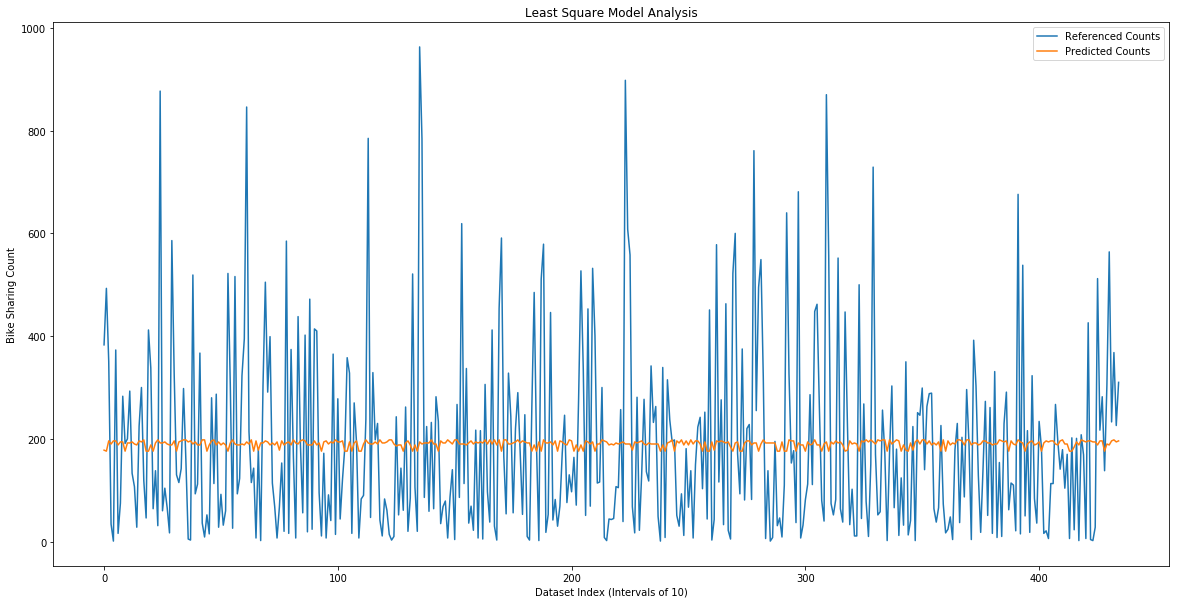

The root mean square error is: 180.0234937743379


In [30]:
# Train Least Square Model
ls = LinearRegress()

ls.train(train[['weekday', 'workingday']].values, train['cnt'].values.reshape(-1, 1))

T = ls.use(test[['weekday', 'workingday']].values)
plt.figure(figsize=(20,10))
plt.title('Least Square Model Analysis')
plt.plot(test['cnt'].values[0::10], label='Referenced Counts')
plt.plot(T[0::10], label='Predicted Counts')
plt.xlabel('Dataset Index (Intervals of 10)')
plt.ylabel('Bike Sharing Count')
plt.legend()
plt.show()

error = np.sqrt(((test['cnt'].values - T) ** 2).mean())
print('The root mean square error is: ' + str(error))

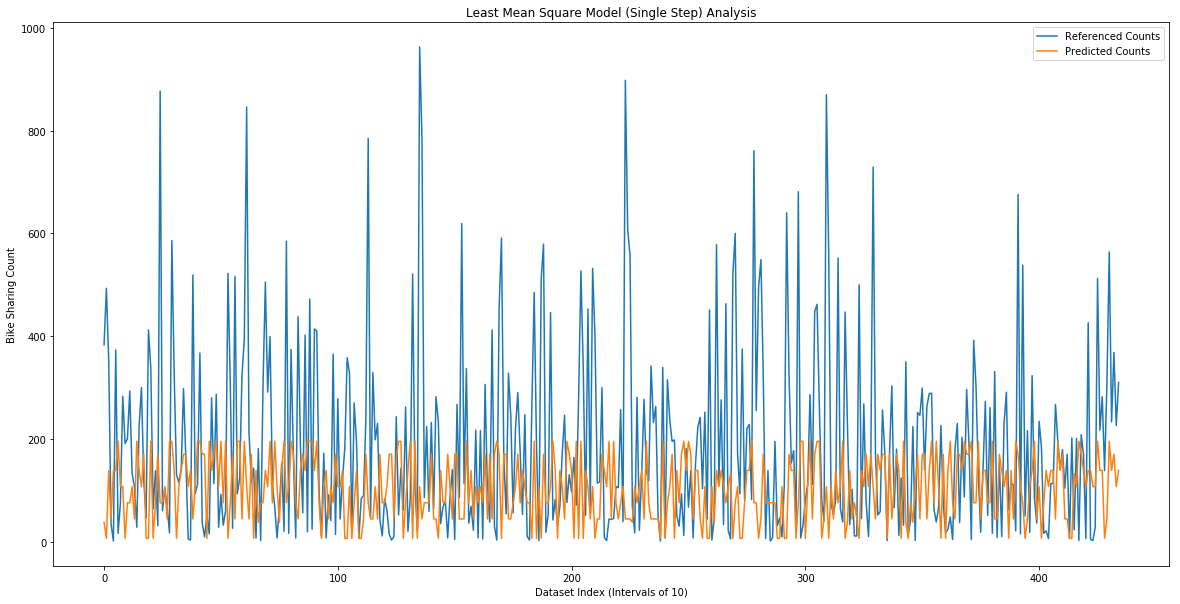

The root mean square error is: 208.11648244322728


In [31]:
# Train Least Mean Square Model (Single Step)
lms = LMS(0.05)
lms.train_step(train[['weekday', 'workingday']].values[0], train['cnt'].values.reshape(-1, 1)[0])

T = lms.use(test[['weekday', 'workingday']].values)
plt.figure(figsize=(20,10))
plt.title('Least Mean Square Model (Single Step) Analysis')
plt.plot(test['cnt'].values[0::10], label='Referenced Counts')
plt.plot(T[0::10], label='Predicted Counts')
plt.xlabel('Dataset Index (Intervals of 10)')
plt.ylabel('Bike Sharing Count')
plt.legend()
plt.show()

error = np.sqrt(((test['cnt'].values - T) ** 2).mean())
print('The root mean square error is: ' + str(error))

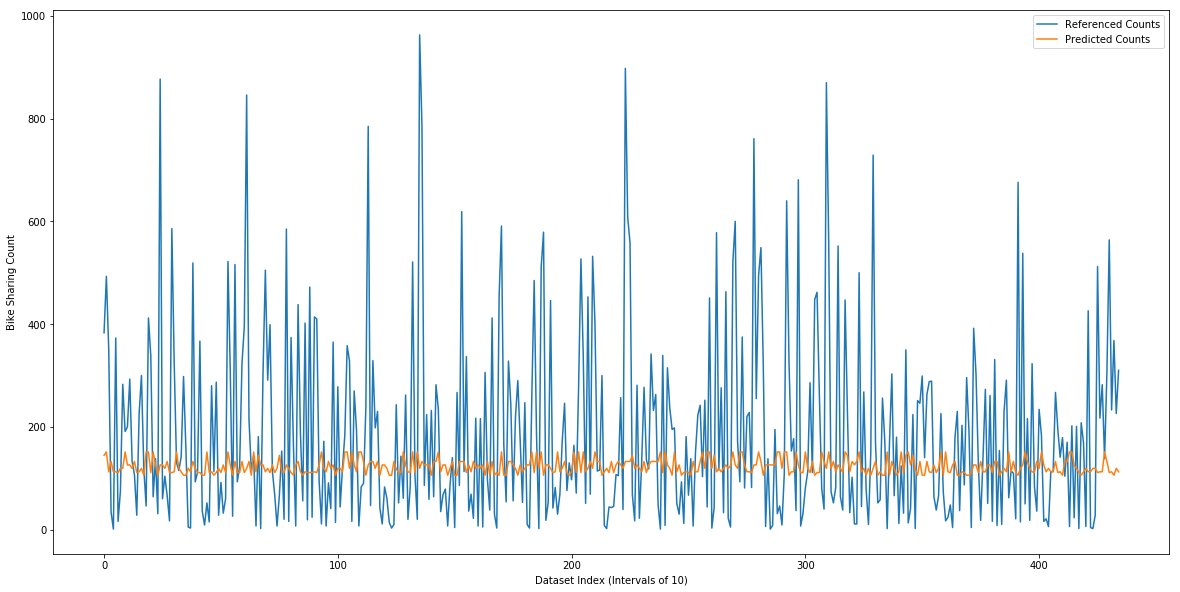

The root mean square error is: 191.95094970122224


In [32]:
# Train Least Mean Square Model
lms = LMS(0.01)
lms.train(train[['weekday', 'workingday']].values, train['cnt'].values.reshape(-1, 1))

T = lms.use(test[['weekday', 'workingday']].values)
plt.figure(figsize=(20,10))
plt.plot(test['cnt'].values[0::10], label='Referenced Counts')
plt.plot(T[0::10], label='Predicted Counts')
plt.xlabel('Dataset Index (Intervals of 10)')
plt.ylabel('Bike Sharing Count')
plt.legend()
plt.show()

error = np.sqrt(((test['cnt'].values - T) ** 2).mean())
print('The root mean square error is: ' + str(error))

### Comparison of Results 
Comparing between the three plots, it is amazing to see that the Least Mean Square (Single Step) has more overlap between referenced and predicted values, while the results of other two models are aligned towards the mean value. The alignment towards the mean value indicates that "weekday" and "workingday" have very less correlation with the Bike Rental count.

### Conclusion
As mentioned, the results in this care are more aligned towards mean. Even though the RMSE is less, the predictions are not precise. This in turn concludes that "weekday" and "workingday" does not have much impact on the count of bike rentals.

# Conclusions

The tasks in this assignment has given a clear picture of the two most common Linear Regression models - Least Square and Least Mean Square. Both models have been tested on the bike sharing dataset. Given a prediction task, these trained models could now be used to predict the business for Bike Sharing companies.

## Challenges
* As the dataset was very large the generated plot was too congested. To overcome this challenge, instead of plotting the entire dataset, intervals are plotted

# References

## Data
The dataset for this experiment is picked from UCI Machine Learning Repository (http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset). It was prepared by Dr. Hadi Fanaee-T in the Laboratory of Articial Intelligence and Dcision Support (LIAAD), University of Porto. The citation for the original source is as follows:

*Fanaee-T, Hadi, and Gama, Joao, 'Event labeling combining ensemble detectors and background knowledge', Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg *

## Plot
Plotting has been done using the Python's Matplotlib package, https://matplotlib.org/index.html. To understand the syntax, following tutorials on the Matplotlib website has been referred.
* https://matplotlib.org/examples/pylab_examples/boxplot_demo.html
* https://matplotlib.org/gallery/api/date.html


# Extra Credit
To determine the most and least important features of the dataset, I have considered the correlation of the features with the "cnt" feature. The correlation matrix is show as follows:


If you want to work more for an extra credit, place your work here about weight analysis. 
Try to answer to the question: 
- what is the most and least significant features for your data.
- what are the consequences if you remove those features from the model? 
    
    

In [33]:
relevant_features = ['yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt']
data[relevant_features].corr()

,yr,mnth,hr,holiday,weekday,workingday,temp,hum,windspeed,cnt
yr,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,0.040913,-0.083546,-0.008740,0.250495
mnth,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.201691,0.164411,-0.135386,0.120638
hr,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,0.137603,-0.276498,0.137252,0.394071
holiday,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.027340,-0.010588,0.003988,-0.030927
weekday,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,-0.001795,-0.037158,0.011502,0.026900
workingday,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.055390,0.015688,-0.011830,0.030284
temp,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,1.000000,-0.069881,-0.023125,0.404772
hum,-0.083546,0.164411,-0.276498,-0.010588,-0.037158,0.015688,-0.069881,1.000000,-0.290105,-0.322911
windspeed,-0.008740,-0.135386,0.137252,0.003988,0.011502,-0.011830,-0.023125,-0.290105,1.000000,0.093234
cnt,0.250495,0.120638,0.394071,-0.030927,0.026900,0.030284,0.404772,-0.322911,0.093234,1.000000


According to the above matrix, Temperature has the highest corelation with "cnt". Next in the order are hour of the day and humidity. Therefore, these are the three most important features for this dataset.

The least important features are "weekday" and "workingday/holiday". To prove this hypothesis, let's re-train the Linear Regression models and execute them first by considering all features, so that least significant features are included with weather conditions and then by removing the two most significant features temperature and humidity.

## Experiment 1: Considering all features

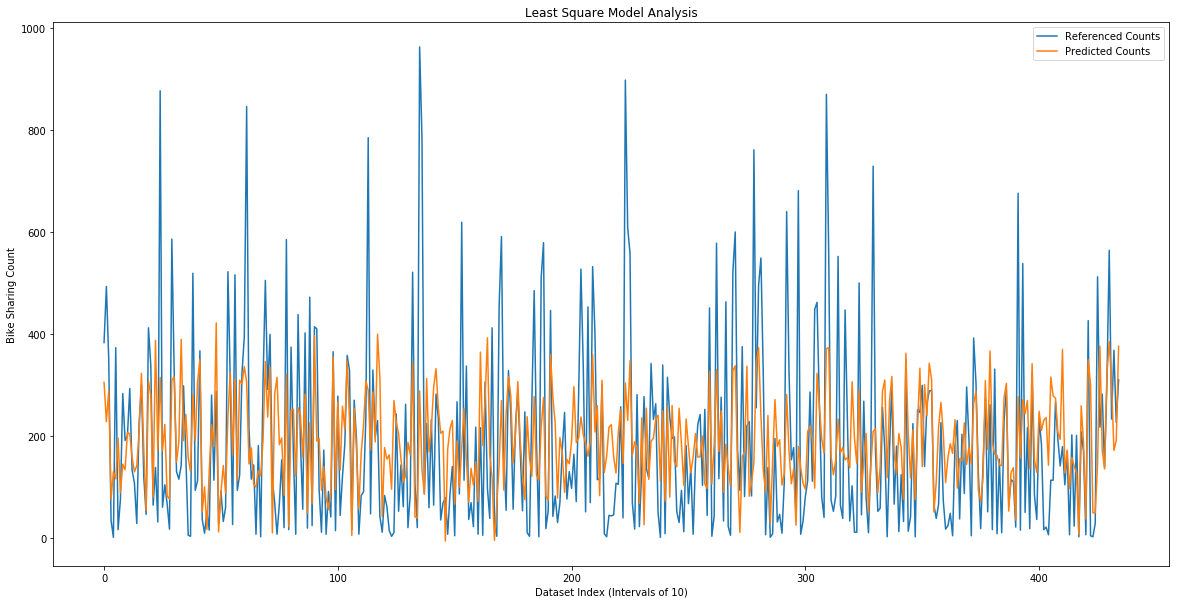

The root mean square error is: 201.11015338821565


In [34]:
# Train Least Square Model
ls = LinearRegress()
ls.train(train[['temp', 'hum', 'windspeed', 'weekday', 'workingday']].values, train['cnt'].values.reshape(-1, 1))

T = ls.use(test[['temp', 'hum', 'windspeed', 'weekday', 'workingday']].values)
plt.figure(figsize=(20,10))
plt.title('Least Square Model Analysis')
plt.plot(test['cnt'].values[0::10], label='Referenced Counts')
plt.plot(T[0::10], label='Predicted Counts')
plt.xlabel('Dataset Index (Intervals of 10)')
plt.ylabel('Bike Sharing Count')
plt.legend()
plt.show()

error = np.sqrt(((test['cnt'].values - T) ** 2).mean())
print('The root mean square error is: ' + str(error))

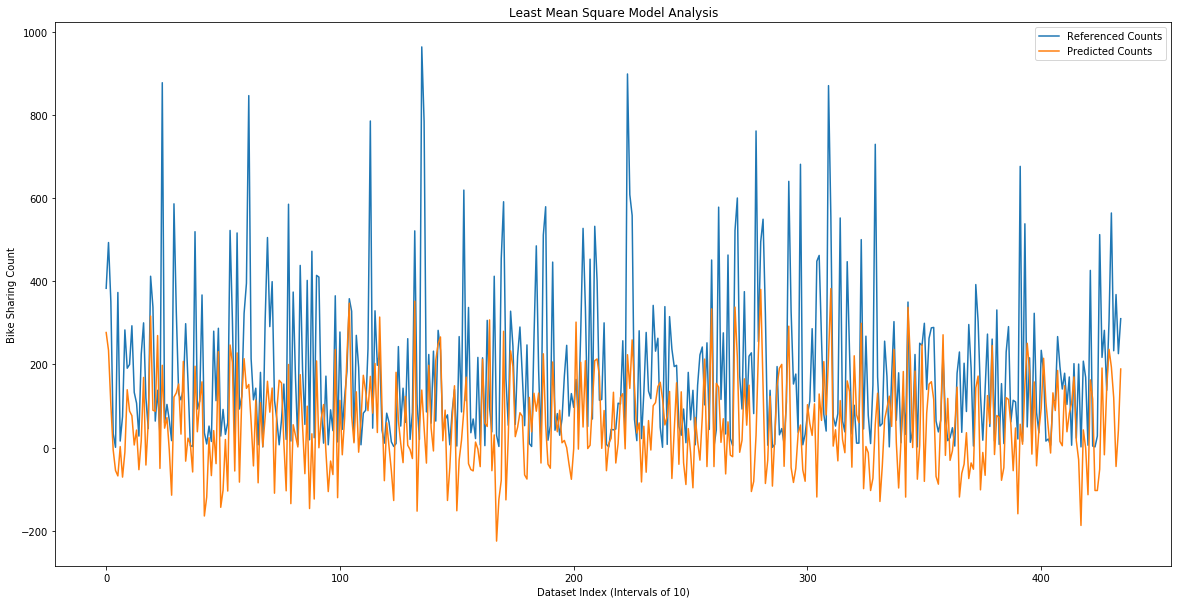

The root mean square error is: 248.22844816924842


In [35]:
# Train Least Mean Square Model
lms = LMS(0.05)
lms.train(train[['temp', 'hum', 'windspeed', 'weekday', 'workingday']].values, train['cnt'].values.reshape(-1, 1))

T = lms.use(test[['temp', 'hum', 'windspeed', 'weekday', 'workingday']].values)
plt.figure(figsize=(20,10))
plt.title('Least Mean Square Model Analysis')
plt.plot(test['cnt'].values[0::10], label='Referenced Counts')
plt.plot(T[0::10], label='Predicted Counts')
plt.xlabel('Dataset Index (Intervals of 10)')
plt.ylabel('Bike Sharing Count')
plt.legend()
plt.show()

error = np.sqrt(((test['cnt'].values - T) ** 2).mean())
print('The root mean square error is: ' + str(error))

### Results:
In the above experiment, weekday and "workingday" are added to the "Bike Rental vs Weather Conditions" experiment. However, the results are very much similar to the previous experiment. Thus, it can be concluded that "weekday" and "workingday" has very less impact on the results.

## Experiment 2: Removing the most important features
The most important features are temperature and humidity. Following analysis skips these features

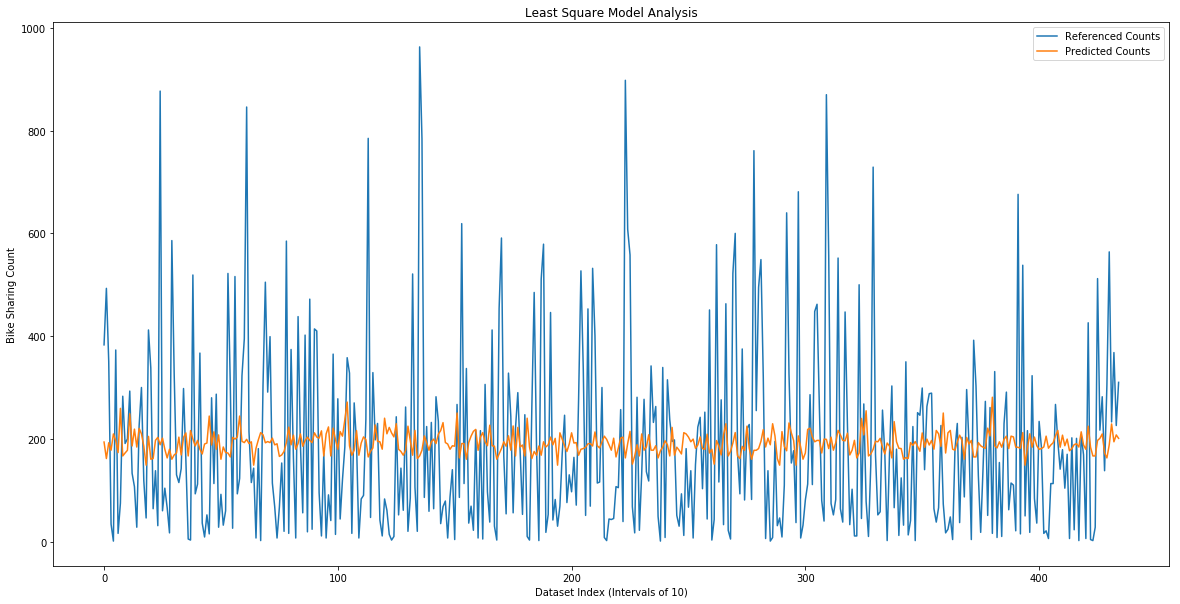

The root mean square error is: 180.877575938039


In [36]:
# Train Least Square Model
ls = LinearRegress()
ls.train(train[['windspeed', 'weekday', 'workingday']].values, train['cnt'].values.reshape(-1, 1))

T = ls.use(test[['windspeed', 'weekday', 'workingday']].values)
plt.figure(figsize=(20,10))
plt.title('Least Square Model Analysis')
plt.plot(test['cnt'].values[0::10], label='Referenced Counts')
plt.plot(T[0::10], label='Predicted Counts')
plt.xlabel('Dataset Index (Intervals of 10)')
plt.ylabel('Bike Sharing Count')
plt.legend()
plt.show()

error = np.sqrt(((test['cnt'].values - T) ** 2).mean())
print('The root mean square error is: ' + str(error))

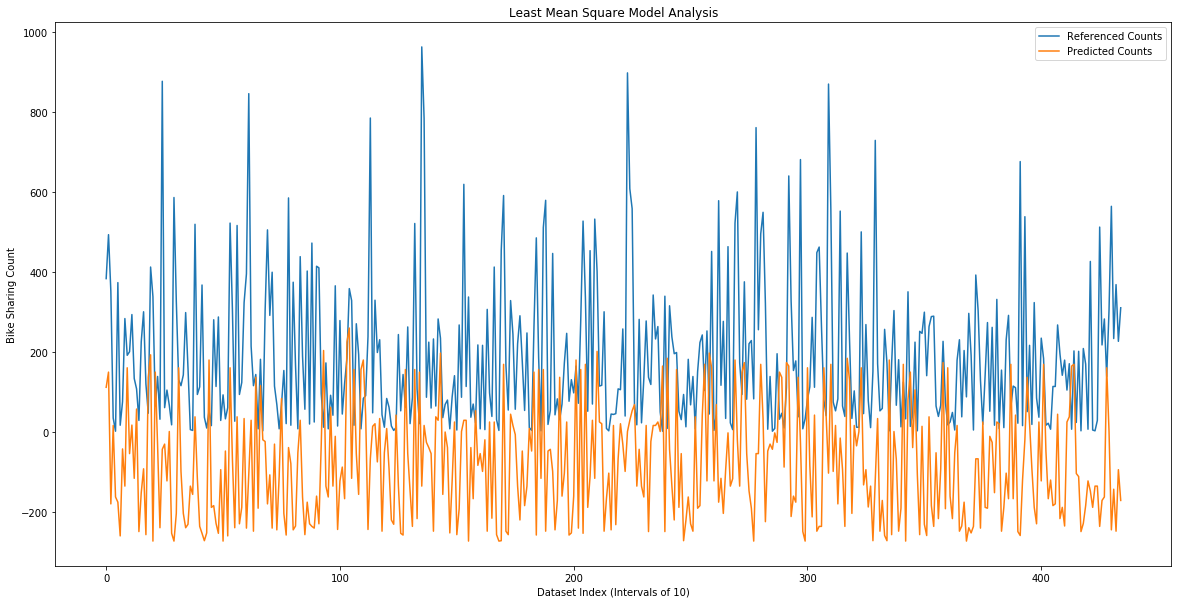

The root mean square error is: 358.2479929410954


In [37]:
# Train Least Mean Square Model
lms = LMS(0.05)
lms.train(train[['windspeed', 'weekday', 'workingday']].values, train['cnt'].values.reshape(-1, 1))

T = lms.use(test[['windspeed', 'weekday', 'workingday']].values)
plt.figure(figsize=(20,10))
plt.title('Least Mean Square Model Analysis')
plt.plot(test['cnt'].values[0::10], label='Referenced Counts')
plt.plot(T[0::10], label='Predicted Counts')
plt.xlabel('Dataset Index (Intervals of 10)')
plt.ylabel('Bike Sharing Count')
plt.legend()
plt.show()

error = np.sqrt(((test['cnt'].values - T) ** 2).mean())
print('The root mean square error is: ' + str(error))

## Results:
While the Least Square model gives mean values, the predictions of Least Mean Square are very much incorrect. From this experiment it is concluded that temperature and humidity are the most important factors in determining the Bike Rentals.

# Preliminary Test

In [38]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]
def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )


training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.
